<a href="https://colab.research.google.com/github/joshuao879/Math123-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Things to tinker with

# 1) # of clusters (k)
# 2) # of features (dimensionality)
# 3) how it deals with outliers (outlier test)
# 4) other variations of k means
# 5) large datasets

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.5 MB/s eta 0:00:00


# Importing Data/Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn_extra.cluster import KMedoids

import matplotlib.pyplot as plt


In [ ]:
#X = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/wine-clustering.csv')
X = pd.read_csv('/content/gdrive/MyDrive/wine-clustering.csv')
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(scaled_data, columns=X.columns)
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Setup: K Means
Baseline test of all K means clustering algorithm

### K Means

In [ ]:
kmeans = KMeans(n_clusters=3, n_init="auto", init = "random", max_iter = 300)

# Fit KMeans to your data
kmeans.fit(X)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_assignments)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_assignments)

# Store inertia
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Inertia: {inertia}")
print("")
print(f"Cluster Assignments: {cluster_assignments}")

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648
Inertia: 1277.9284888446423

Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### K Medoids

In [ ]:
k_medoids = KMedoids(n_clusters=3, init = "random")

# Fit KMedoids to your data
k_medoids.fit(X)

# Get cluster assignments
cluster_assignments_medoids = k_medoids.labels_

# Calculate silhouette score
silhouette_avg_medoids = silhouette_score(X, cluster_assignments_medoids)

# Calculate Davies-Bouldin Index
db_index_medoids = davies_bouldin_score(X, cluster_assignments_medoids)

# Store inertia
inertia_medoids = k_medoids.inertia_

print(f"Silhouette Score: {silhouette_avg_medoids}")
print(f"Davies-Bouldin Index: {db_index_medoids}")
print(f"Inertia: {inertia_medoids}")
print("")
print(f"Cluster Assignments: {cluster_assignments_medoids}")




Silhouette Score: 0.26597740204536796
Davies-Bouldin Index: 1.4159902440648873
Inertia: 501.0038186706377

Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1
 1 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 1 2 2 2 2 2 2 2 2 2 2 1 1
 2 2 2 2 2 2 2 2 2 1 1 0 2 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Problem 1: Outliers

K Means has an issue with outliers as it treats all data equally


## Crazy Outlier Test

Testing the 3 K clustering methods on wine dataset where one crazy outlier is appended

In [ ]:
data = {'Alcohol': [1000], 'Malic_Acid': [5000], 'Ash': [-3000], 'Ash_Alcanity': [800], 'Magnesium': [-200], 'Total_Phenols': [600], 'Flavanoids': [-400], 'Nonflavanoid_Phenols': [900], 'Proanthocyanins': [200], 'Color_Intensity': [-700], 'Hue': [1200], 'OD280': [-1500], 'Proline': [2500]}

# Create a DataFrame for the outlier row
outlier_row = pd.DataFrame(data)

# Append the outlier row to your existing DataFrame
X_extreme_outlier = pd.concat([X, outlier_row], ignore_index=True)
X_extreme_outlier

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


### K Means

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto', init = "random")

# Fit KMeans to your data
kmeans.fit(X_extreme_outlier)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_extreme_outlier, cluster_assignments)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_extreme_outlier, cluster_assignments)

# Store inertia
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Inertia: {inertia}")
print("")
print(f"Cluster Assignments: {cluster_assignments}")

Silhouette Score: 0.2668144521143731
Davies-Bouldin Index: 0.9656380381040108
Inertia: 1659.0079672511506

Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]


### K Medoids

In [ ]:
k_medoids = KMedoids(n_clusters=3, init = "random")

# Fit KMedoids to your data
k_medoids.fit(X_extreme_outlier)

# Get cluster assignments
cluster_assignments_medoids = k_medoids.labels_

# Calculate silhouette score
silhouette_avg_medoids = silhouette_score(X_extreme_outlier, cluster_assignments_medoids)

# Calculate Davies-Bouldin Index
db_index_medoids = davies_bouldin_score(X_extreme_outlier, cluster_assignments_medoids)

# Store inertia
inertia_medoids = k_medoids.inertia_

print(f"Silhouette Score: {silhouette_avg_medoids}")
print(f"Davies-Bouldin Index: {db_index_medoids}")
print(f"Inertia: {inertia_medoids}")
print("")
print(f"Cluster Assignments: {cluster_assignments_medoids}")


Silhouette Score: -0.08384778093959791
Davies-Bouldin Index: 1.9699314743847527
Inertia: 7390.444422926756

Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 2 0 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Problem 2: Randomly Initialized Clusters

The standard K means algorithm randomly initializes clusters

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=3, init = "random", max_iter = 5)

# Fit KMeans to your data
kmeans.fit(X)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_assignments)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_assignments)

# Store inertia
inertia = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Inertia: {inertia}")
print("")
print(f"Cluster Assignments: {cluster_assignments}")

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648
Inertia: 1277.9284888446423


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
kmeans_pp = KMeans(n_clusters=3, n_init='auto', init = "k-means++", max_iter = 5)

# Fit KMeans to your data
kmeans_pp.fit(X)

# Get cluster assignments
cluster_assignments_pp = kmeans_pp.labels_

# Calculate silhouette score
silhouette_avg_pp = silhouette_score(X, cluster_assignments_pp)

# Calculate Davies-Bouldin Index
db_index_pp = davies_bouldin_score(X, cluster_assignments_pp)

# Store inertia
inertia_pp = kmeans_pp.inertia_

print(f"Silhouette Score: {silhouette_avg_pp}")
print(f"Davies-Bouldin Index: {db_index_pp}")
print(f"Inertia: {inertia_pp}")
print("")
print(f"Cluster Assignments: {cluster_assignments_pp}")

Silhouette Score: 0.28594199657074876
Davies-Bouldin Index: 1.391793832317738
Inertia: 1279.3078453651483


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

# Problem 3: Convergence With Large Datasets

Although K-means is generally fast, the convergence time can become an issue with very large datasets, especially if many iterations are required to reach stability. This can be exacerbated by poor initialization or datasets with complex structures.


In [ ]:
#Implement mini batch k means


from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

drive.mount('/content/drive')

from google.colab import drive
import numpy as np



# Path to the file in your Google Drive
data = pd.read_csv('/content/drive/MyDrive/wine-clustering.csv')


# Step 3: Data preprocessing (optional based on data exploration)
# Standardize the data if necessary
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 4: Configure MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=3, batch_size=100, max_iter=100)

# Step 5: Fit the model to the data
mbk.fit(data_scaled)

# Step 6: Predict the cluster labels
labels = mbk.labels_

# Step 7: Summarize the results
print("Cluster Centers:\n", mbk.cluster_centers_)
print("Cluster Labels:\n", labels)

# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, labels)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled, labels)

# Store inertia
inertia = mbk.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Inertia: {inertia}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
 [[-0.93664367 -0.34968892 -0.42817968  0.20882928 -0.44056338 -0.10150583
   0.03101319 -0.01946004  0.13525619 -0.89090072  0.43757971  0.2814384
  -0.73056202]
 [ 0.86052636 -0.36680242  0.25491663 -0.62142352  0.53789158  0.86233397
   0.94224203 -0.60900118  0.57214539  0.1803428   0.50445989  0.72997952
   1.20543608]
 [ 0.16783947  0.88737494  0.19439978  0.54082713 -0.0897266  -1.0076209
  -1.20231581  0.65674716 -0.79993685  0.92708976 -1.15282906 -1.26940191
  -0.41785035]]
Cluster Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Silhouette Score: 0.28594199657074876
Davies-Bouldin Index: 1.391793832317738
Inertia: 1280.933192737331


# Problem 4: High Dimensionality

As the dimensionality of the dataset increases (a common feature of large datasets), the efficiency of K-means decreases. High dimensions make distance calculations more complex and less meaningful (a phenomenon known as the "curse of dimensionality"). Dimensionality reduction techniques like PCA (Principal Component Analysis) are often used before clustering to mitigate this issue.


Variance explained by the first two components: 55.41%
Silhouette Score: 0.5601697480957203
Davies-Bouldin Index: 0.5977226208167407
Inertia: 260.01666268357667

Cluster Assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


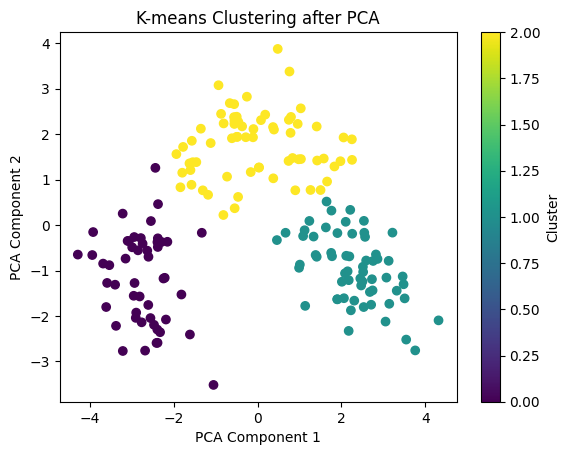

In [ ]:
#Implement PCA

from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=2)

# Fit PCA to the standardized data
#pca_result = pca.fit_transform(data_scaled)
pca_result = pca.fit_transform(X)

print("Variance explained by the first two components: {:.2f}%".format(sum(pca.explained_variance_ratio_) * 100))


kmeans = KMeans(n_clusters=3, n_init="auto", init = "random", max_iter = 300)
kmeans.fit(pca_result)

cluster_labels = kmeans.labels_
cluster_assignments = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_assignments)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pca_result, cluster_assignments)

# Store inertia
inertia = kmeans.inertia_


print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Inertia: {inertia}")
print()
print("Cluster Assignments:\n", cluster_labels)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering after PCA')
plt.colorbar(label='Cluster')
plt.show()


# Problem 5: Assumption of Round Clusters

K Means Clustering typically uses Euclidean distance in its computations which leads to round clusters. Thus, K Means has trouble when the groundtruth data is actually non spherical

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


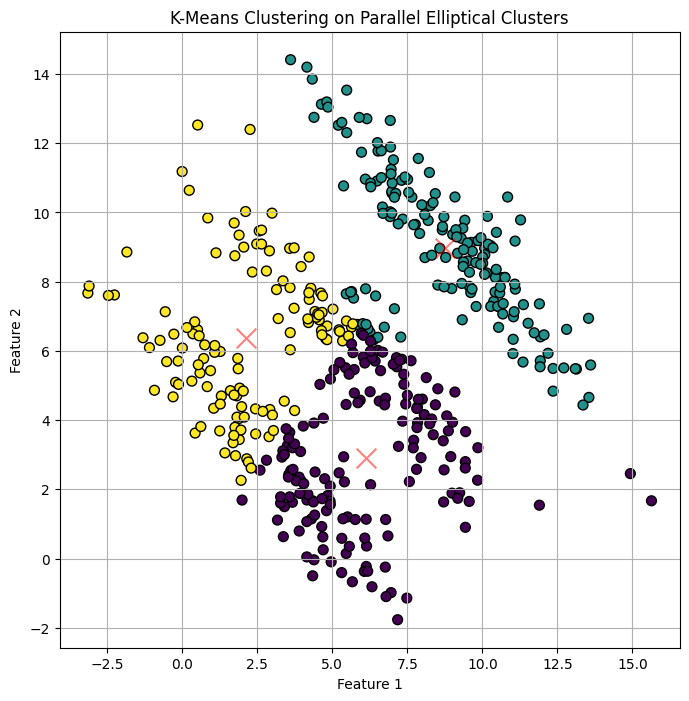

In [ ]:
#Could also just suggest to use DBSCAN or Gaussian Mixture Models

#Implement alternative distance metric to calculate k means (cosine similarity or Mahalanobis distance). Maybe experiment with DBSCAN but not a priority

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def generate_elliptical_data(mean, cov, num_samples):
    """Generates elliptical data points with specified mean and covariance."""
    return np.random.multivariate_normal(mean, cov, num_samples)

# Define the common covariance matrix to create elongated and parallel ellipses
angle = np.pi / 4  # 45 degrees, defines the tilt of the ellipse
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
])
scale = np.diag([0.5, 10])  # Scale the x-axis more for elongation
covariance = rotation_matrix @ scale @ rotation_matrix.T

# Mean of each cluster
mean1 = [3, 3]
mean2 = [6, 6]
mean3 = [9, 9]

# Generating synthetic data for each cluster
cluster1 = generate_elliptical_data(mean1, covariance, 150)
cluster2 = generate_elliptical_data(mean2, covariance, 150)
cluster3 = generate_elliptical_data(mean3, covariance, 150)

# Combine clusters
Y = np.vstack([cluster1, cluster2, cluster3])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(Y)

# Plotting the clustering results
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title("K-Means Clustering on Parallel Elliptical Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()







# Problem 6: Choosing Right Number of Clusters

Elbow Method:

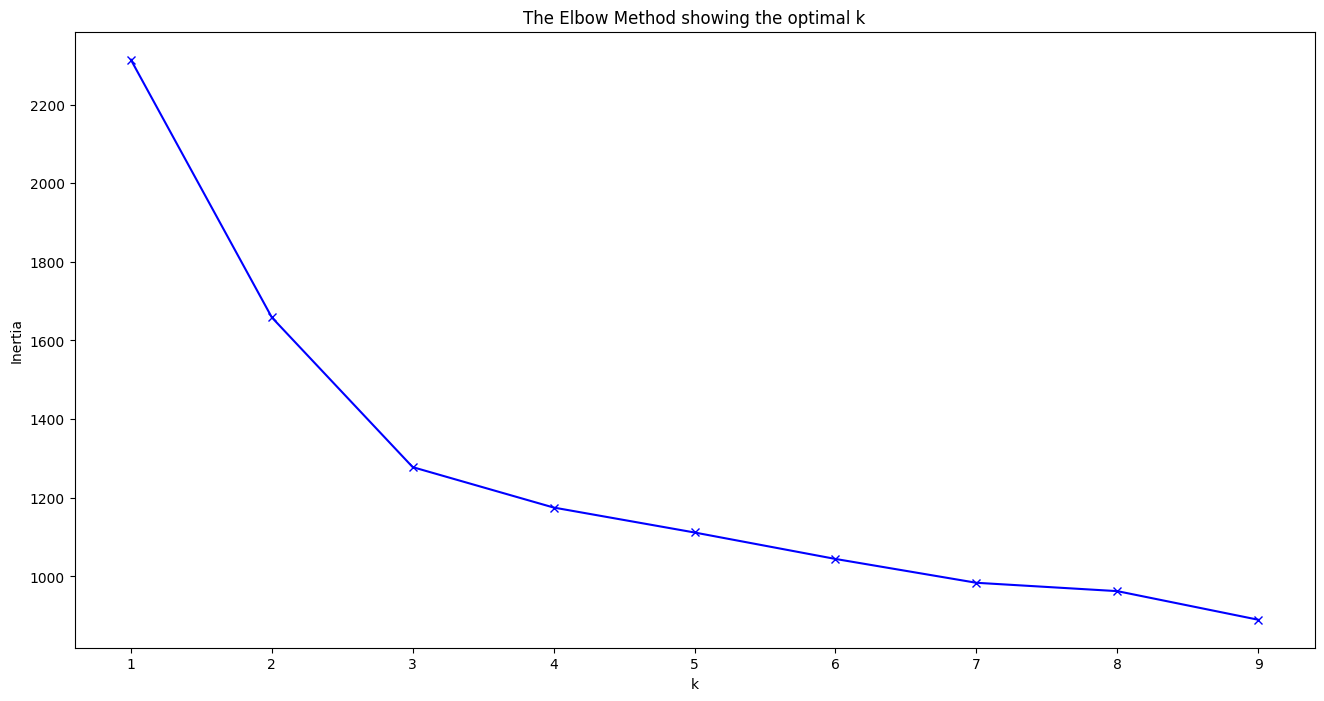

In [ ]:
#Implement Cross Validation or Elbow Method
inertia = []
K = range(1, 10)  # Test 1 through 10 clusters, though you might choose a wider range depending on your dataset
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Silhouette Score

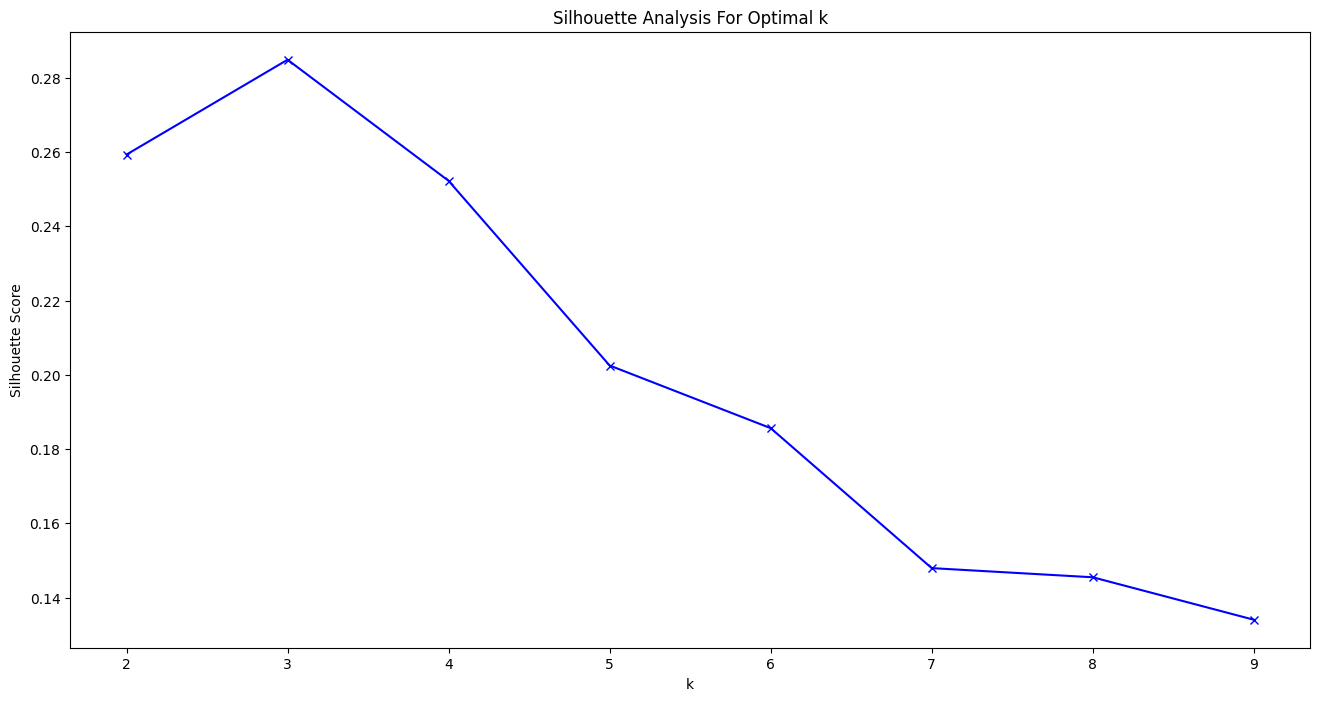

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_avg = []
for k in range(2, 10):
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(X)
    cluster_labels = kmeanModel.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(16,8))
plt.plot(range(2, 10), silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()